# Correlated-k Distribution

In [1]:
from exojax.test.emulate_mdb import mock_mdbExomol, mock_wavenumber_grid
from exojax.opacity.premodit.api import OpaPremodit
from exojax.opacity.ckd.api import OpaCKD
from exojax.opacity.ckd.core import compute_g_ordinates
import jax.numpy as jnp
import matplotlib.pyplot as plt
from jax import config

config.update("jax_enable_x64", True)

nus, wav, res = mock_wavenumber_grid(lambda0=22930.0, lambda1=22940.0, Nx=20000)
mdb = mock_mdbExomol("H2O")
opa = OpaPremodit(mdb, nus, auto_trange=[500.0, 1500.0])

xsmode =  modit
xsmode assumes ESLOG in wavenumber space: xsmode=modit
Your wavelength grid is in ***  ascending  *** order
The wavenumber grid is in ascending order by definition.
Please be careful when you use the wavelength grid.
xsmode =  modit
xsmode assumes ESLOG in wavenumber space: xsmode=modit
Your wavelength grid is in ***  ascending  *** order
The wavenumber grid is in ascending order by definition.
Please be careful when you use the wavelength grid.
HITRAN exact name= H2(16O)
radis engine =  vaex


/home/kawahara/exojax/src/exojax/utils/grids.py:85: UserWarning: Both input wavelength and output wavenumber are in ascending order.
  warnings.warn(
/home/kawahara/exojax/src/exojax/utils/grids.py:85: UserWarning: Both input wavelength and output wavenumber are in ascending order.
  warnings.warn(
/home/kawahara/exojax/src/exojax/utils/grids.py:85: UserWarning: Both input wavelength and output wavenumber are in ascending order.
  warnings.warn(
/home/kawahara/exojax/src/exojax/utils/grids.py:85: UserWarning: Both input wavelength and output wavenumber are in ascending order.
  warnings.warn(
/home/kawahara/exojax/src/exojax/utils/molname.py:197: FutureWarning: e2s will be replaced to exact_molname_exomol_to_simple_molname.
  warnings.warn(
/home/kawahara/exojax/src/exojax/utils/molname.py:91: FutureWarning: exojax.utils.molname.exact_molname_exomol_to_simple_molname will be replaced to radis.api.exomolapi.exact_molname_exomol_to_simple_molname.
  warnings.warn(
/home/kawahara/exojax/s

Molecule:  H2O
Isotopologue:  1H2-16O
ExoMol database:  None
Local folder:  H2O/1H2-16O/SAMPLE
Transition files: 
	 => File 1H2-16O__SAMPLE__04300-04400.trans
Broadener:  H2
Broadening code level: a1
DataFrame (self.df) available.
OpaPremodit: params automatically set.
default elower grid trange (degt) file version: 2
Robust range: 485.7803992045456 - 1514.171191195336 K
OpaPremodit: Tref_broadening is set to  866.0254037844389 K


/home/kawahara/exojax/src/exojax/opacity/initspec.py:423: UserWarning: Some of the line centers are outside of the wavenumber grid.
  warnings.warn("Some of the line centers are outside of the wavenumber grid.")
/home/kawahara/exojax/src/exojax/opacity/initspec.py:424: UserWarning: All of the line center should be within wavenumber grid for PreMODIT/MODIT/DIT.
  warnings.warn(


max value of  ngamma_ref_grid : 408.3653171415405
min value of  ngamma_ref_grid : 255.5370493260595
ngamma_ref_grid grid : [251.71289062 291.46240259 337.48898319 390.7838979  452.4949646 ]
max value of  n_Texp_grid : 0.457
min value of  n_Texp_grid : 0.218
n_Texp_grid grid : [0.21599999 0.3785     0.54100007]


uniqidx: 100%|██████████| 3/3 [00:00<00:00, 33465.19it/s]

Premodit: Twt= 1108.7151960064205 K Tref= 570.4914318566549 K
Making LSD:|####################| 100%


In [2]:
[opa.nu_grid[0], nus[0]]

[4359.1979075849995, 4359.1979075849995]

In [3]:
def sample_g(nus, xsv, j_pickup, Ng=10):
    idx, k_g, g = compute_g_ordinates(xsv)
    
    edges = jnp.linspace(0.0, 1.0, Ng + 1)
    cut_idx = jnp.searchsorted(g, edges)
    
    nus_segments = [nus[idx[cut_idx[i]:cut_idx[i+1]]] for i in range(Ng)]
    xsv_segments = [xsv[idx[cut_idx[i]:cut_idx[i+1]]] for i in range(Ng)]
    
    k_low = k_g[cut_idx[j_pickup]]
    k_high = k_g[cut_idx[j_pickup+1]-1]
    k_med = (k_low + k_high) * 0.5
    mask = (xsv >= k_low) & (xsv < k_high)
    
    return {
        'k_g': k_g, 'g': g, 'edges': edges, 'cut_idx': cut_idx,
        'nus_segments': nus_segments, 'xsv_segments': xsv_segments,
        'k_med': k_med, 'mask': mask
    }

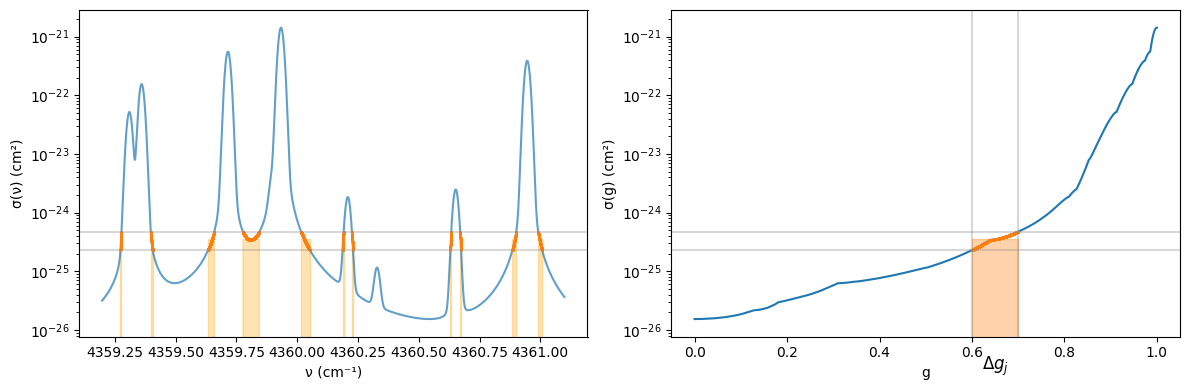

In [4]:


def plot_xsv(nus, xsv, nus_segments, xsv_segments, j, k_med, mask):
    plt.plot(nus, xsv, alpha=0.7)
    plt.fill_between(nus, xsv.min()*0.1, k_med, where=mask, alpha=0.3, color='orange')
    plt.plot(nus_segments[j], xsv_segments[j], '.', markersize=2)
    plt.yscale('log')
    plt.ylabel('σ(ν) (cm²)')
    plt.ylim(xsv.min()*0.5, xsv.max()*2)
    plt.axhline(result['xsv_segments'][j_pickup].max(), alpha=0.3, color="gray")
    plt.axhline(result['xsv_segments'][j_pickup].min(), alpha=0.3, color="gray")

T, P, j_pickup = 1000.0, 0.01, 6
xsv = opa.xsvector(T, P)
result = sample_g(nus, xsv, j_pickup)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

plt.sca(ax1)
plot_xsv(nus, xsv, result['nus_segments'], result['xsv_segments'], j_pickup, result['k_med'], result['mask'])

plt.xlabel('ν (cm⁻¹)')

plt.sca(ax2)
plt.plot(result['g'], result['k_g'])
plt.plot(result['g'][result['cut_idx'][j_pickup]:result['cut_idx'][j_pickup+1]], result['xsv_segments'][j_pickup], '.', markersize=2)
plt.axhline(result['xsv_segments'][j_pickup].max(), alpha=0.3, color="gray")
plt.axhline(result['xsv_segments'][j_pickup].min(), alpha=0.3, color="gray")
plt.axvline(result['edges'][j_pickup], alpha=0.3, color="gray")
plt.axvline(result['edges'][j_pickup + 1], alpha=0.3, color="gray")
plt.text((result['edges'][j_pickup] + result['edges'][j_pickup + 1]) / 2, xsv.min()*0.1, "$\\Delta g_j$", 
         horizontalalignment="center", verticalalignment="bottom", fontsize=12)
plt.yscale('log')
plt.xlabel('g')
plt.ylabel('σ(g) (cm²)')
plt.ylim(xsv.min()*0.5, xsv.max()*2)
plt.fill_between(
    # nus, k_low, k_high,
    [result['edges'][j_pickup], result['edges'][j_pickup+1]],
    xsv.min()*0.1*jnp.ones(2),
    result['k_med'],
    step="mid",
    color="tab:orange",
    alpha=0.35,
)

plt.tight_layout()
plt.show()

In [5]:
opa_ckd = OpaCKD(opa, band_width=nus[-1]-nus[0], Ng=16)
T_grid = jnp.array([700.0, 1000.0, 1300.0])
P_grid = jnp.array([0.001, 0.01, 0.1])

opa_ckd.precompute_tables(T_grid, P_grid)


Generated g-grid: 16 points, range [0.0053, 0.9947]
Processing 1 spectral bands...
  Band 1: [4359.2, 4361.1] cm⁻¹, 20000 frequencies
Creating CKD table info...
CKD precomputation complete! Ready for interpolation.
Table dimensions: T=3, P=3, g=16, bands=1


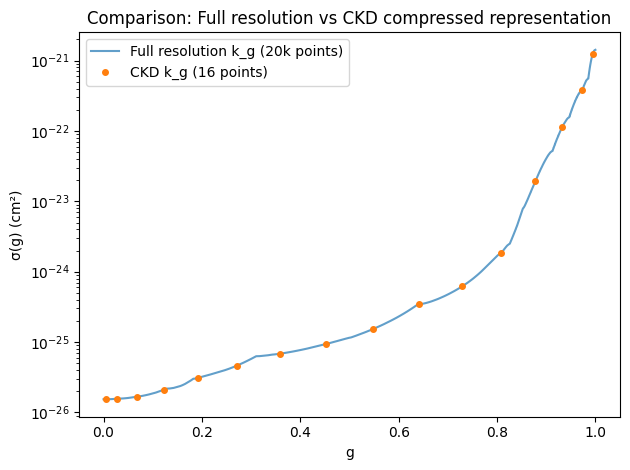

In [6]:
ggrid = opa_ckd.ckd_info.ggrid
xsckd = opa_ckd.xsvector(1000.0, 0.01)

# For fair comparison, interpolate result['k_g'] to the same g-grid as CKD

fig = plt.figure()
plt.plot(result['g'], result['k_g'], alpha=0.7, label='Full resolution k_g (20k points)')
plt.plot(ggrid, xsckd, 'o', markersize=4, label='CKD k_g (16 points)')
plt.yscale('log')
plt.xlabel('g')
plt.ylabel('σ(g) (cm²)')
plt.legend()
plt.title('Comparison: Full resolution vs CKD compressed representation')
plt.tight_layout()
plt.show()



In [7]:
T, P

(1000.0, 0.01)

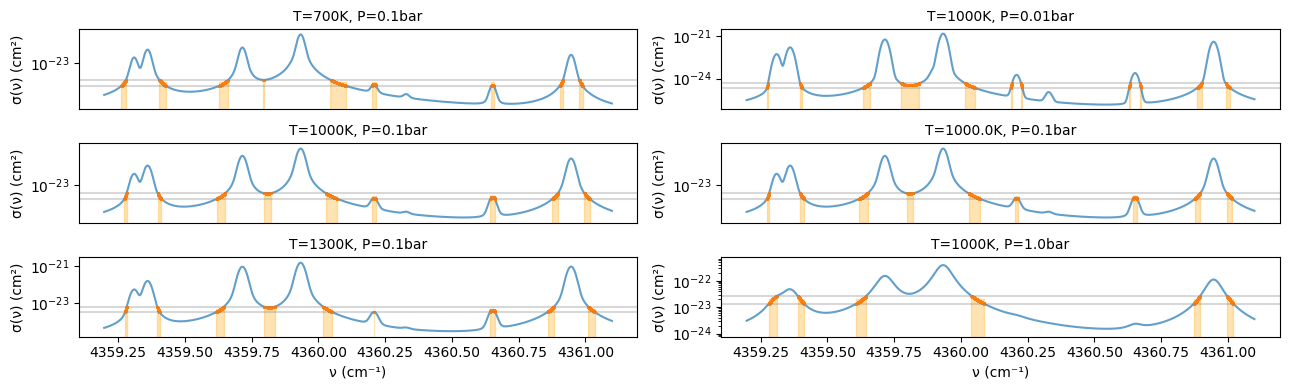

In [8]:
conditions = [(700, 0.1), (1000, 0.01), (1000, 0.1), (1000.0, 0.1), (1300, 0.1), (1000, 1.0)]

fig, axes = plt.subplots(3, 2, figsize=(13, 4))
axes = axes.flatten()

for i, (T, P) in enumerate(conditions):
    plt.sca(axes[i])
    xsv = opa.xsvector(T, P)
    result = sample_g(nus, xsv, 6)
    plot_xsv(nus, xsv, result['nus_segments'], result['xsv_segments'], 6, result['k_med'], result['mask'])
    plt.title(f'T={T}K, P={P}bar', fontsize=10)
    if i < 4:
        axes[i].xaxis.set_ticklabels([])
        axes[i].axes.get_xaxis().set_ticks([])

    if i >= 4:
        plt.xlabel('ν (cm⁻¹)')

plt.tight_layout()
plt.show()